<a href="https://colab.research.google.com/github/SelvamRaju/Advanced-Computer-Vision/blob/main/Advanced_Computer_Vision_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Advanced Computer Vision Part-2

Domain : Face Recognition

***Note : This notebook is developed on top of the hint template provided along with the question and was in-line with the exact question and the expected operations.***

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [8]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

In [9]:
# imports
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder. [ Score: 2 points ]

In [11]:
#Declaring the working directory (Directory in Drive)
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/CV-Advanced/Part-2/');

In [12]:
#Listing the files under the current working directory
!ls

 Benedict-Cumberbatch9.jpg   image-data.zip
 Dwayne-Johnson4.jpg	    'Part 3 - vgg_face_weights.h5'


#### Extract the zip file [ Score: 2 points ]
- Extract Aligned Face Dataset from Pinterest.zip

In [13]:
# Extracting/unzipping the image files

!unzip image-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner57_1691.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner65_1682.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner66_1688.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner68_1651.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner69_1662.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner70_1642.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turn

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [14]:
import numpy as np

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [15]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image [ Score: 2 points ]
- Load one image using the function "load_image"

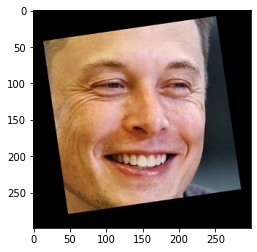

In [16]:
# Displaying 1 sample image from the dataset
sampleImagePath = 'pins/PINS/pins_elon musk/elon musk7.jpg'
sampleImage = load_image(sampleImagePath)
plt.imshow(sampleImage)
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model [ Score: 2 points ]
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [18]:
WEIGHTS_FILE = "Part 3 - vgg_face_weights.h5"
model = vgg_face()
model.load_weights(WEIGHTS_FILE)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

### Get vgg_face_descriptor

In [19]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [20]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


#### Generate embeddings for all images  [ Score: 3 points ]
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [21]:
embeddings=[]
labels=[]
file_names=[]
for i in metadata:
  try:
    img_path = i.image_path()
    file_name = img_path.split('/')
    name = file_name[-2]
    name = name.split('_')
    finalname = name[-1]
    labels.append(finalname)
    file_names.append(img_path)
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings.append(embedding_vector)
    itemindex = metadata.tolist().index(i)
    if itemindex%1000 == 0:
      print('Processed '+str(itemindex+1)+' images')  
  except Exception:
    print("Issue with:  "+img_path)
    listofzeros = [0] * 2622
    embeddings.append(listofzeros)

Processed 1 images
Processed 1001 images
Processed 2001 images
Processed 3001 images
Processed 4001 images
Processed 5001 images
Processed 6001 images
Processed 7001 images
Processed 8001 images
Processed 9001 images
Processed 10001 images


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [22]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

In [23]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

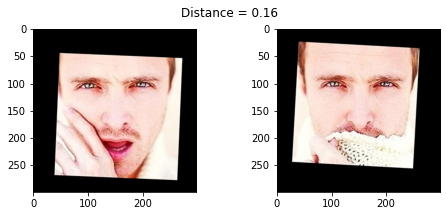

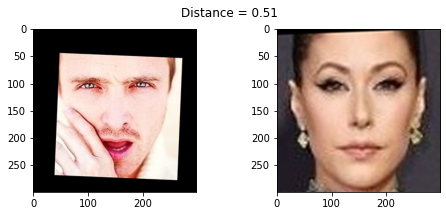

In [24]:
show_pair(2, 3)
show_pair(2, 180)

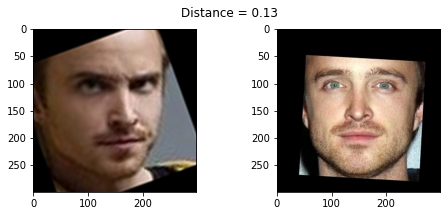

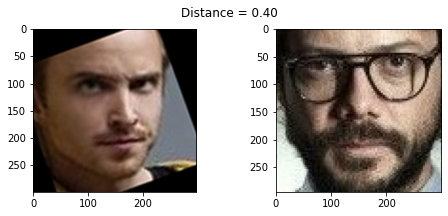

In [25]:
show_pair(30, 31)
show_pair(30, 100)

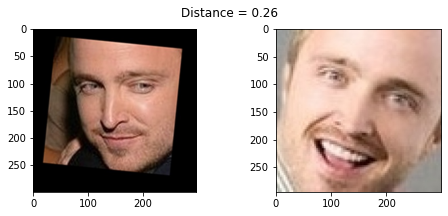

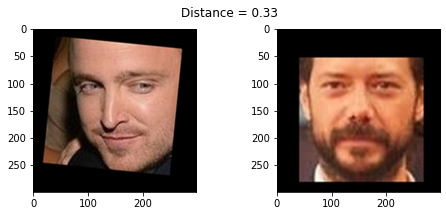

In [26]:
show_pair(70, 72)
show_pair(70, 115)

#### Create train and test sets [ Score: 2 points ]
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [27]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Encode the Labels  [ Score: 2 points ]
- Encode the targets
- Use LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
y_train = encoded_labels[train_idx]
y_test = encoded_labels[test_idx]

#### Standardize the feature values [ Score: 2 points ]
- Scale the features using StandardScaler

In [29]:
# Standarize features
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
x_scaled = standardScaler.fit_transform(embeddings)

In [30]:
x_train = x_scaled[train_idx]
x_test = x_scaled[test_idx]

#### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 128) 
pca.fit_transform(x_train)
pca.fit_transform(x_test)

array([[-26.4627136 ,  13.01073754,  18.14709422, ...,  -0.51371493,
          0.63163595,   3.31413722],
       [ -8.18901382,  19.41246478,  10.1388392 , ...,  -2.57103433,
         -1.83632112,  -0.84148608],
       [-12.90221455,   8.74543448,  -7.21547379, ...,   2.26874976,
          0.76206734,   1.91883469],
       ...,
       [ 13.56714534, -22.50050281, -11.5426919 , ...,  -1.14273759,
         -2.79633803,   1.9957826 ],
       [ 18.91407021,  -1.84966275, -13.04731895, ...,  -1.53785743,
          2.36673437,  -2.31596662],
       [ 19.48427455, -32.97316038,  -3.97187272, ...,  -2.12242037,
          1.15132947,   0.88674515]])

In [117]:
print(pca.n_components_) #As mentioned n_components is set to 128

128


#### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [118]:
from sklearn.svm import SVC

classifier = SVC()
svc_model= classifier.fit(x_train, y_train)

In [119]:
# Training Score
print("Training Score: {}".format(classifier.score(x_train, y_train)))

Training Score: 0.9975974093805494


In [120]:
# Test Score
print("Training Score: {}".format(classifier.score(x_test, y_test)))

Training Score: 0.9615705931495405


#### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

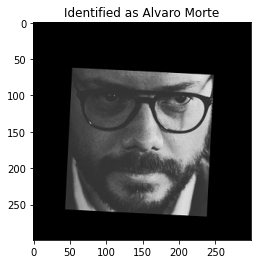

In [121]:
example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc_model.predict(np.expand_dims(x_test[example_idx], axis=0))
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

# Model is good and gives accurately predicted result

**Recognizing the 1st test image given**



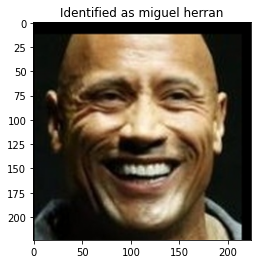

In [126]:
firstImagePath = 'Dwayne-Johnson4.jpg'
firstImage = load_image(firstImagePath)
firstImage = (firstImage / 255.).astype(np.float32)
firstImage = cv2.resize(firstImage, dsize = (224,224))
firstImage_vector = vgg_face_descriptor.predict(np.expand_dims(firstImage, axis=0))[0]

firstImagePrediction = svc_model.predict(np.expand_dims(firstImage_vector, axis=0))
firstImageIdentity = le.inverse_transform(firstImagePrediction)[0]
plt.imshow(firstImage)
plt.title(f'Identified as {firstImageIdentity}');

**Recognizing the 2nd test image given**

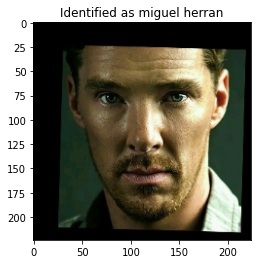

In [127]:
secondImagePath = 'Benedict-Cumberbatch9.jpg'
secondImage = load_image(secondImagePath)
secondImage = (secondImage / 255.).astype(np.float32)
secondImage = cv2.resize(secondImage, dsize = (224,224))
secondImage_vector = vgg_face_descriptor.predict(np.expand_dims(secondImage, axis=0))[0]

secondImagePrediction = svc_model.predict(np.expand_dims(secondImage_vector, axis=0))
secondImageIdentity = le.inverse_transform(secondImagePrediction)[0]
plt.imshow(secondImage)
plt.title(f'Identified as {secondImageIdentity}');

**It is seen that the prediction is Miguel Herran for any image passed as input, which is wrong. Suspecting the image conversion is not right. After spending more time to debug I have decided to pass the random index id of the person from the array of images in dataset and pass it to the model to test if its working fine or not.**

PINS/pins_Dwayne Johnson/Dwayne Johnson103.jpg


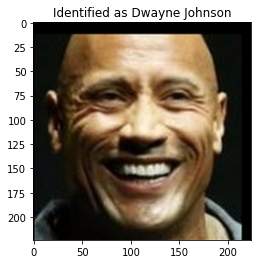

In [197]:
first_image_id = 221 # id from array having Dwayne Johnson

first_image = load_image(metadata[test_idx][first_image_id].image_path())
print(metadata[test_idx][first_image_id].image_path())
first_image_prediction = svc_model.predict(np.expand_dims(x_test[first_image_id], axis=0))
first_image_identity = le.inverse_transform(first_image_prediction)[0]

plt.imshow(firstImage) # Dispalying the test image given
plt.title(f'Identified as {first_image_identity}');

PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch28.jpg


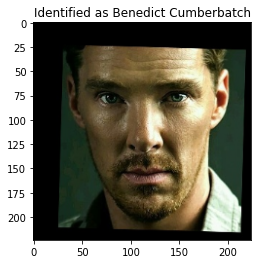

In [198]:
second_image_id = 55 # id from array having Benedict Cumberbatch

second_image = load_image(metadata[test_idx][second_image_id].image_path())
print(metadata[test_idx][second_image_id].image_path())
second_image_prediction = svc_model.predict(np.expand_dims(x_test[second_image_id], axis=0))
second_image_identity = le.inverse_transform(second_image_prediction)[0]

plt.imshow(secondImage)  # Dispalying the test image given
plt.title(f'Identified as {second_image_identity}');